In [443]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

Inciso A

In [444]:
h = 6.62607015e-34 
c = 299792458
k = 1.380649e-23

In [445]:
longitudes_de_onda = np.linspace(1e-9, 2000e-9, 2000)
temperaturas = [10000, 8000, 5000, 3000]
print(frecuencias)

[1.000e+12 2.000e+12 3.000e+12 ... 1.998e+15 1.999e+15 2.000e+15]


In [446]:
def densidad(longitudes_de_onda, temperaturas):
    return((8 * np.pi * h ) / (longitudes_de_onda**3) * (1 / (np.exp((h * c) / (longitudes_de_onda * k * temperaturas)) - 1)))

C:\Users\Juan Tamayo\AppData\Local\Temp\ipykernel_12108\3961804049.py:2: RuntimeWarning: overflow encountered in exp
  return((8 * np.pi * h ) / (longitudes_de_onda**3) * (1 / (np.exp((h * c) / (longitudes_de_onda * k * temperaturas)) - 1)))


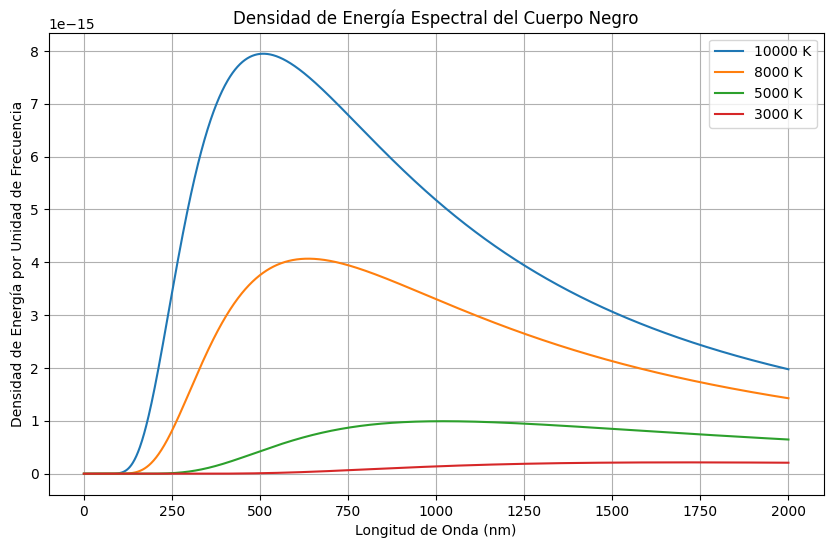

In [447]:
plt.figure(figsize=(10, 6))
for t in temperaturas:
    densidad_de_energía = [densidad(l, t) for l in longitudes_de_onda]
    plt.plot(longitudes_de_onda * 1e9, densidad_de_energía, label=f"{t} K")   
plt.xlabel('Longitud de Onda (nm)')
plt.ylabel('Densidad de Energía por Unidad de Frecuencia')
plt.title('Densidad de Energía Espectral del Cuerpo Negro')
plt.legend()
plt.grid(True)
plt.show()

Inciso B


In [448]:
maxdensidades = []
for t in temperaturas:
    list = []
    for l in longitudes_de_onda:   
        densidad_de_energía = densidad(l, t) 
        list.append(( densidad_de_energía, l))
    maxvalor = max(list)
    maxdensidades.append(maxvalor)
print(maxdensidades)  

[(7.947722279930814e-15, 5.099999999999999e-07), (4.069231579566875e-15, 6.369999999999999e-07), (9.934652849913515e-16, 1.02e-06), (2.14588501558132e-16, 1.6999999999999998e-06)]


C:\Users\Juan Tamayo\AppData\Local\Temp\ipykernel_12108\3961804049.py:2: RuntimeWarning: overflow encountered in exp
  return((8 * np.pi * h ) / (longitudes_de_onda**3) * (1 / (np.exp((h * c) / (longitudes_de_onda * k * temperaturas)) - 1)))


In [449]:
lambdaspico = []
for densidad in maxdensidades:
    lambdaspico.append(densidad[1]*1e9)
print("Las longitudes de onda en el pico para cada temperatura son: ")
print(lambdaspico)
    

Las longitudes de onda en el pico para cada temperatura son: 
[509.9999999999999, 636.9999999999999, 1020.0, 1699.9999999999998]


Inciso C

In [450]:
frecuencias = np.linspace(1e12, 2000e12, 2000) 
temperatura = 8000

In [451]:
def densidad_frecuencias(frecuencias, temperaturasf):
    return(8 * np.pi * h * frecuencias**3) / (c**3) * (1 / (np.exp((h * frecuencias) / (k * temperatura)) - 1))

In [452]:
def curva_rayleigh(frecuencias, temperaturasf):
    return (8 * np.pi * frecuencias**2 * k * temperaturasf) / c**3

In [453]:
Alfa = 5e-12
Beta = 5e-12
def curva_wien(frecuencias, temperaturasf):
    return (8 * np.pi * h * frecuencias**3) / (c**3) * (1 / (np.exp((h * frecuencias) / (k * temperatura))))

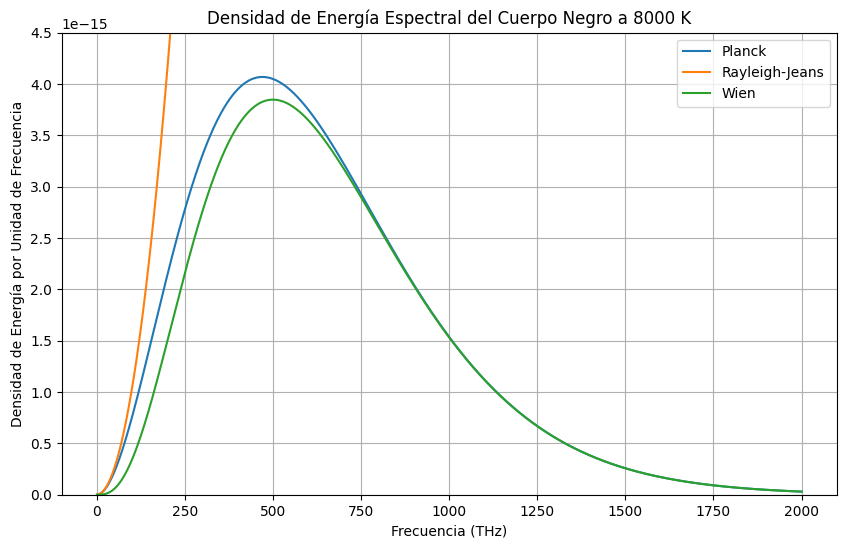

In [454]:
plt.figure(figsize=(10, 6))
densidad_de_energía_f = [densidad_frecuencias(f, temperatura) for f in frecuencias]
densidad_de_energía_rayleigh = [curva_rayleigh(f, temperatura) for f in frecuencias]
densidad_de_energía_wien = [curva_wien(f, temperatura) for f in frecuencias]
plt.plot(frecuencias*1e-12 , densidad_de_energía_f, label="Planck")
plt.plot(frecuencias*1e-12 , densidad_de_energía_rayleigh, label="Rayleigh-Jeans")
plt.plot(frecuencias*1e-12 , densidad_de_energía_wien, label="Wien")
plt.ylim(0, 4.5e-15)
plt.xlabel('Frecuencia (THz)')
plt.ylabel('Densidad de Energía por Unidad de Frecuencia')
plt.title(f'Densidad de Energía Espectral del Cuerpo Negro a {temperatura} K')
plt.legend()
plt.grid(True)
plt.show()


In [460]:
mse_jeans = np.mean((np.array(densidad_de_energía_rayleigh) - np.array(densidad_de_energía_f))**2)
mse_wien = np.mean((np.array(densidad_de_energía_wien) - np.array(densidad_de_energía_f))**2)

In [461]:
diferencia_de_areas_jeans = simps(np.abs(np.array(densidad_de_energía_rayleigh) - np.array(densidad_de_energía_f)), frecuencias)
diferencia_de_areas_wien = simps(np.abs(np.array(densidad_de_energía_rayleigh) - np.array(densidad_de_energía_f)), frecuencias)

In [462]:
print(f"Error cuadrático medio para ryleigh: {mse_jeans:.4e}")
print(f"Área bajo la curva de diferencia absoluta para rayleigh: {diferencia_de_areas_jeans:.4e}")

Error cuadrático medio para ryleigh: 3.3850e-26
Área bajo la curva de diferencia absoluta para rayleigh: 2.7165e+02


In [463]:
print(f"Error cuadrático medio para wien: {mse_wien:.4e}")
print(f"Área bajo la curva de diferencia absoluta para rayleigh: {diferencia_de_areas_wien:.4e}")

Error cuadrático medio para wien: 5.2982e-32
Área bajo la curva de diferencia absoluta para rayleigh: 2.7165e+02
